In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')

In [3]:
data.set_index("Row ID", inplace=True)

In [4]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

In [7]:
data.isnull().any()

Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [8]:
data.duplicated().any()

True

As there is Dublicate data. I'll drop duplicate data using drop_duplicates() method.

In [9]:
data = data.drop_duplicates()

In [10]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971
std,32065.074478,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Droping unnecessary columns

In [11]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
data = data.drop(['Order ID','Customer ID', 'Postal Code'], axis=1) 

Hypothesis 1: East region has highest sales than other region

In [13]:
highest_sales = data.groupby('Region')['Sales'].sum().reset_index()
highest_sales

,Region,Sales
0,Central,501239.8908
1,East,678499.8680
2,South,391721.9050
3,West,725457.8245


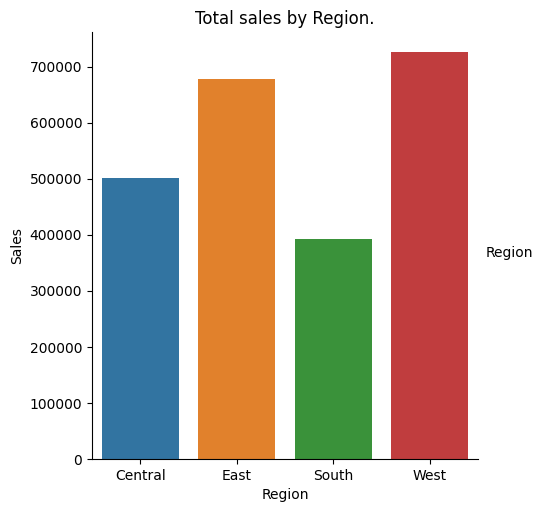

In [14]:
sns.catplot(x="Region", y="Sales", data=highest_sales,kind = "bar", hue="Region")
plt.title("Total sales by Region.")
plt.show()
# Outcome = As you can see in bar diagram west region has highest sales, So this hypothesis is not supported.

Hypothesis 2: Orders with same day shipping have lowest rate of returned products. 

In [15]:
ship_mode_orders_total = data.groupby('Ship Mode').size()
return_order = data[data['Profit']<0].groupby('Ship Mode').size()
shipping_return_percent = (return_order / ship_mode_orders_total) * 100
shipping_return_percent

Ship Mode
First Class       19.050715
Same Day          18.047882
Second Class      15.784062
Standard Class    19.641361
dtype: float64

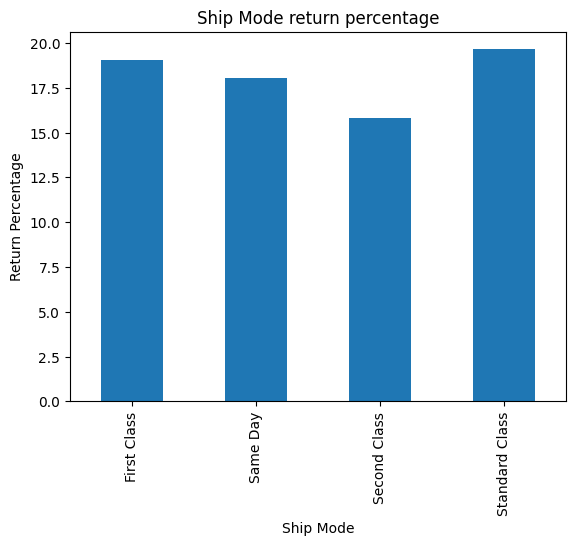

In [16]:
shipping_return_percent.plot(kind="bar")
plt.title("Ship Mode return percentage")
plt.xlabel("Ship Mode")
plt.ylabel("Return Percentage")
plt.show() 
# Outcome = Hypothesis is not supported because Same Day shipping is not less than other class.

Hypothesis 3: Tech products have high profit margin than other product type

In [19]:
total_profit_based_category = data.groupby('Category')['Profit'].sum().reset_index()
total_profit_based_category

,Category,Profit
0,Furniture,18463.3316
1,Office Supplies,122490.8008
2,Technology,145454.9481


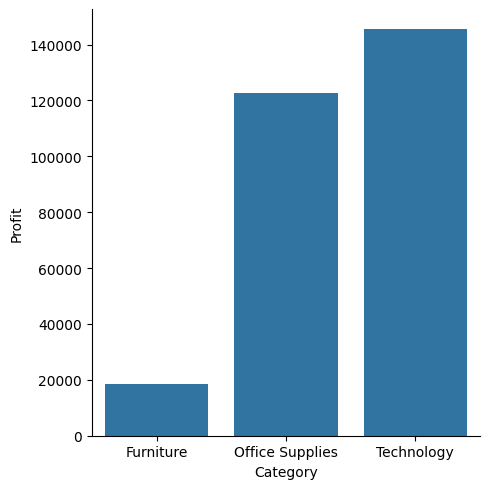

In [20]:
sns.catplot(x="Category", y = "Profit", data=total_profit_based_category, kind="bar")
plt.show()
# Outcome = Hypothesis is supported as Tech products have high profit margin than other product type